In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("cleaned_iris.csv")

## Label encoding and Scaling

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

scaler = StandardScaler()
num_cols = ['sepal_width', 'petal_width']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [4]:
df.sample(5)

,sepal_width,petal_width,species
29,0.331139,-1.335700,0
32,2.397636,-1.468099,0
30,0.101529,-1.335700,0
34,0.331139,-1.335700,0
69,-0.587304,0.120690,1


In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## ALGO'S

## Logistc Regression

In [6]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

In [7]:
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Accuracy of the Logistic Regression model: 1.0000

Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


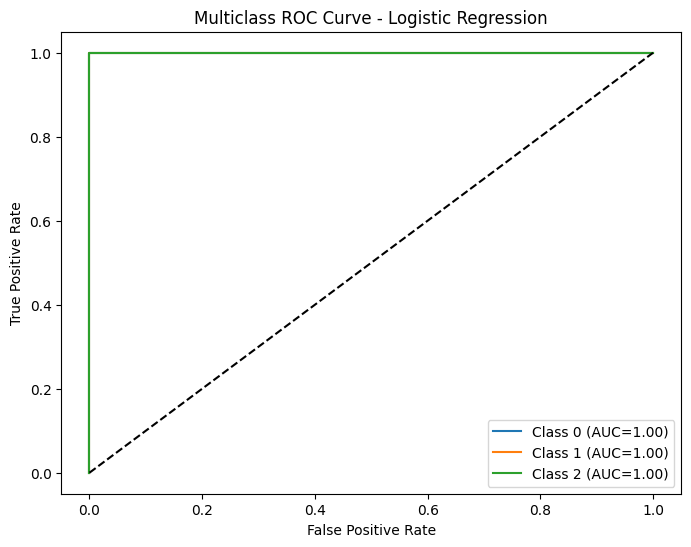

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_prob = log.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Logistic Regression")
plt.legend()
plt.show()


## Linear Regression

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(r2_score(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_lr))

0.9210096322720018
0.05230917685098551


## KNN 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of the KNN model: {knn_score:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy of the KNN model: 1.0000

Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

dt_score = accuracy_score(y_test, y_pred_tree)
print("Accuracy Score:", dt_score)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Accuracy Score: 0.9666666666666667

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(estimator=dt, param_grid=param_grid, 
                    cv=5, scoring="accuracy", n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9576086956521739


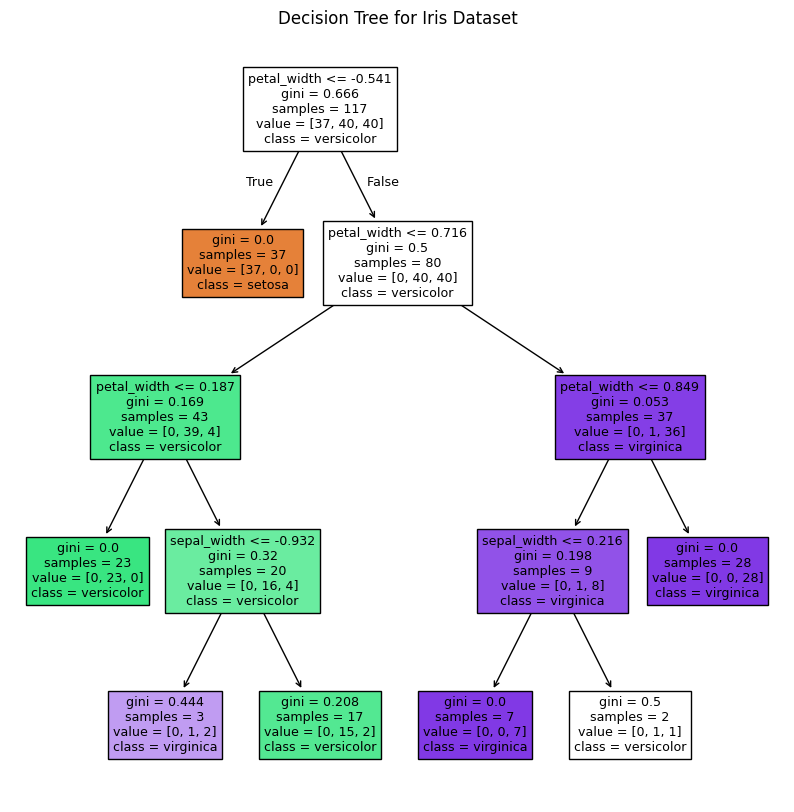

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(tree,
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=le.classes_)
plt.title("Decision Tree for Iris Dataset")
plt.show()

<Axes: xlabel='species', ylabel='count'>

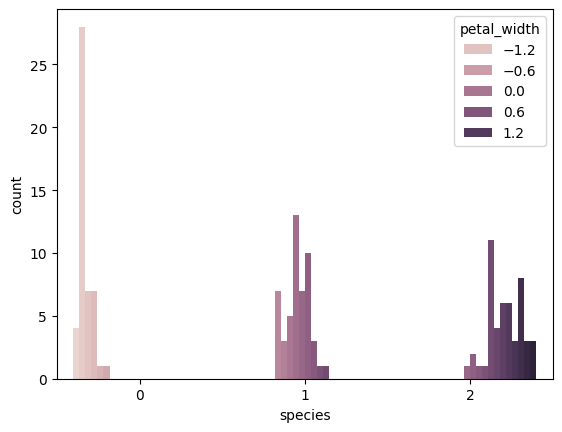

In [14]:
sns.countplot(x='species', hue='petal_width', data=df)

- Here the virginica and versicolor are very similar that's why its difficult to seperate these 2

## KMeans

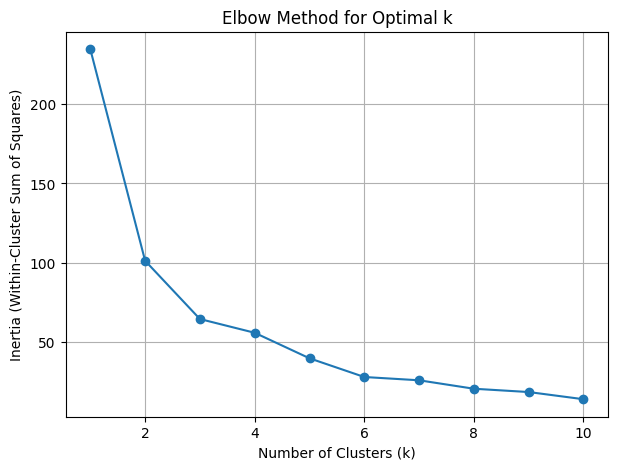

In [15]:
from sklearn.cluster import KMeans

inertia = []
cluster_range = range(1,11)

for i in cluster_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_train)
    inertia.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans.fit(X_train)

clusters = kmeans.predict(X_test)


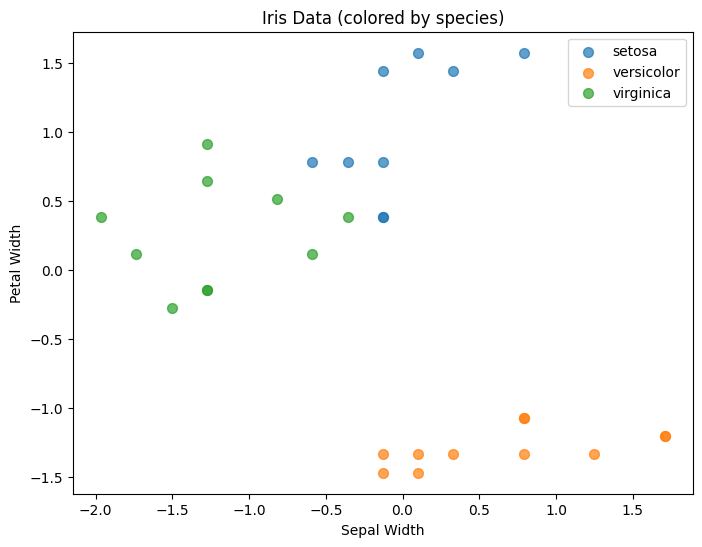

In [17]:
species_names = le.inverse_transform(clusters)

plt.figure(figsize=(8,6))

for species in np.unique(species_names):
    mask = species_names == species
    plt.scatter(X_test['sepal_width'][mask], X_test['petal_width'][mask],
                s=50, alpha=0.7, label=species)

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Iris Data (colored by species)")
plt.legend()
plt.show()


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators= 20,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_tree = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Train Accuracy: 0.98
Test Accuracy: 0.97


c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## SVM

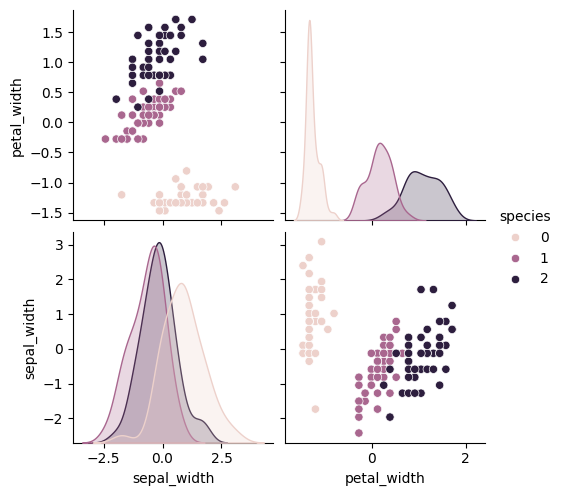

In [19]:
sns.pairplot(df, x_vars=['sepal_width','petal_width'], y_vars=['petal_width','sepal_width'],
             hue='species', kind='scatter')
plt.show()

In [20]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',    
    random_state=42
)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Accuracy: 1.0

Confusion Matrix:
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train Accuracy: 0.95
Test Accuracy: 1.00


c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
import pickle

with open("train_test_splilts.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

So based on all the algorithm we applied the top three algos were logist, knn and svm
- we are choosing svm as the data are a bit not linear 